In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import my_functions as mf
from matplotlib.colors import LogNorm
from matplotlib import cm
from scipy.ndimage import gaussian_filter

In [35]:
%matplotlib inline

In [36]:
xmin = 1.
xmax = 110.
xn = 21
x = np.linspace(xmin,xmax,xn)

ymin = 1.
ymax = 110.
yn = 21
y = np.linspace(ymin,ymax,yn)

zmin = 1
zmax = 110
zn =  21
z = np.linspace(zmin,zmax,zn)

X,Y,Z = np.meshgrid(x,y,z)

#rho_m = (((X-5)*(X-5))+((Y-2)*(Y-2))+((Z-10)*(Z-10)))

rho_m = 7*X*Y*Z/(X**2 + Y**2 + Z**2)

In [37]:
xx,yy,zz,x1,y1,z1,rho = mf.select_area(0,100,0,100,0,100,x,y,z,rho_m)

In [38]:
rho1 = np.ravel(rho)
lx,ly,lz = rho.shape
print(lx,ly,lz)

18 18 18


In [39]:
rho_sm = gaussian_filter(rho, sigma=1.)
rho_sm1 = np.ravel(rho_sm)

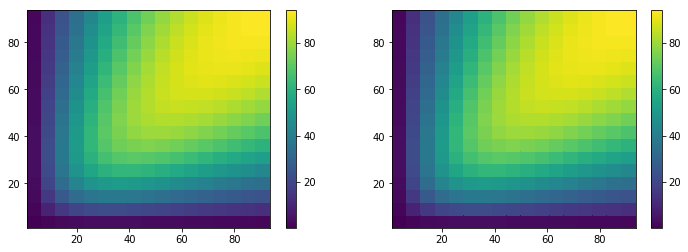

In [40]:
mx,my = np.meshgrid(y1,x1)
mx1,my1 = np.meshgrid(z1,y1)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pcolor(mx,my,rho[:,:,5])
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolor(my1,mx1,rho[5,:,:])

plt.colorbar()
plt.show()

In [62]:
# Control points

c1 = np.copy(x1)+1
c2 = np.copy(y1)+1
c3 = np.copy(z1)+1

Xc,Yc,Zc = np.meshgrid(c1,c2,c3)


xc = np.ravel(Xc)
yc = np.ravel(Yc)
zc = np.ravel(Zc)

ln = xc.size

In [63]:
xc.size,yc.size,zc.size

(5832, 5832, 5832)

In [64]:
xx.size,yy.size,zz.size

(5832, 5832, 5832)

In [65]:
# Calculate interpolation function
t = 0.8
A = mf.calc_A_by_column(xx,yy,zz,xc,yc,zc,1,t)

In [66]:
H = np.dot(A.T,A)

In [67]:
h0 = np.trace(H)/ln

In [68]:
mu = 1E-8*h0
print( mu)

5.720735904537189e-05


In [69]:
p = np.linalg.solve(H+(mu*np.identity(ln)),np.dot(A.T,rho_sm1))

In [70]:
# #Interpolation points

dx1 = (x1[1:]+x1[:-1])/2
dy1 = (y1[1:]+y1[:-1])/2
dz1 = (z1[1:]+z1[:-1])/2

x0n = len(dx1)
y0n = len(dy1)
z0n = len(dz1)

X0,Y0,Z0 = np.meshgrid(dx1,dy1,dz1)


x0 = np.ravel(X0)
y0 = np.ravel(Y0)
z0 = np.ravel(Z0)

rho_0real = 7*X0*Y0*Z0/(X0**2 + Y0**2 + Z0**2)

In [71]:
x0.size,y0.size,z0.size

(4913, 4913, 4913)

In [72]:
xc.size,yc.size,zc.size

(5832, 5832, 5832)

In [73]:
print(x1)
print(x0)

[ 1.    6.45 11.9  17.35 22.8  28.25 33.7  39.15 44.6  50.05 55.5  60.95
 66.4  71.85 77.3  82.75 88.2  93.65]
[ 3.725  3.725  3.725 ... 90.925 90.925 90.925]


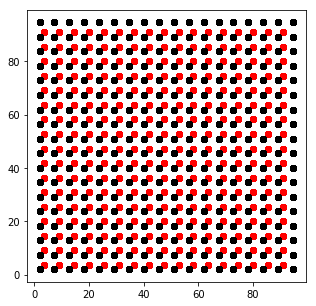

In [74]:
plt.figure(figsize=(5,5))
plt.plot(x0,y0,'ro')
plt.plot(xc,yc,'ko')

In [75]:
t = 0.8

In [76]:
# Interpolate funtion rho in points x0, y0, z0

A0 = mf.calc_A_by_column(x0,y0,z0,xc,yc,zc,1,t)

In [77]:
# Interpolated matrix
rho0 = np.dot(A0,p)
rho0_m = rho0.reshape((x0n,y0n,z0n))

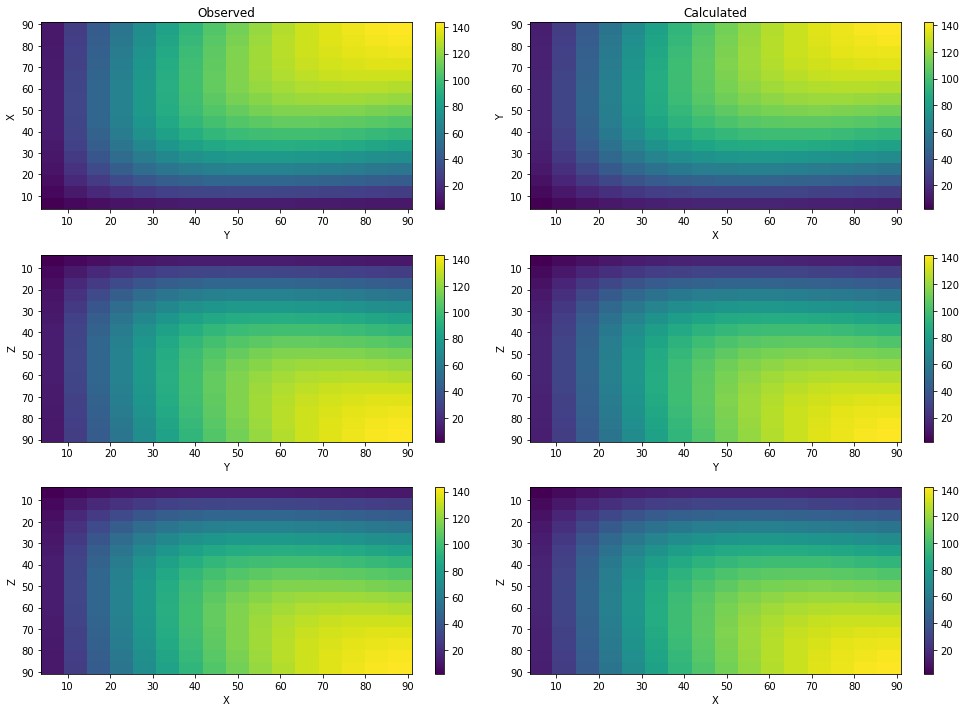

In [78]:
mf.plot_function_6sub(50,50,50,dx1,dy1,dz1,dx1,dy1,dz1,rho_0real,rho0_m)